In [1]:
# Libraries

import matplotlib.pyplot as plt
import pandas as pd
import torch
import json 

# Preliminaries
from datasets import load_dataset

# Models

import torch.nn as nn
from transformers import AutoTokenizer, BertForSequenceClassification, DataCollatorWithPadding

# Training

from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

## Reading in data

In [2]:
dataset = load_dataset("scicite")

Using custom data configuration default
Reusing dataset scicite (C:\Users\Benjamin Aw\.cache\huggingface\datasets\scicite\default\1.0.0\cb102eb6c2a9e96c287c1723c1399156ba699ec30d435bfa9b07c7745d73c820)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
dataset["train"]

Dataset({
    features: ['string', 'sectionName', 'label', 'citingPaperId', 'citedPaperId', 'excerpt_index', 'isKeyCitation', 'label2', 'citeEnd', 'citeStart', 'source', 'label_confidence', 'label2_confidence', 'id'],
    num_rows: 8194
})

## Tokenising text

Using Tokerniser to create a dataset class for training of the model with:
1. Labels: The label of the training data
2. Text: The training data

In [4]:
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")

In [5]:
def preprocess_function(examples):
    return tokenizer(examples["string"], truncation = True, max_length = 512)

In [6]:
tokenized_dataset = dataset.map(preprocess_function, batched=True)

Loading cached processed dataset at C:\Users\Benjamin Aw\.cache\huggingface\datasets\scicite\default\1.0.0\cb102eb6c2a9e96c287c1723c1399156ba699ec30d435bfa9b07c7745d73c820\cache-4a80bb7c64a7cbd9.arrow
Loading cached processed dataset at C:\Users\Benjamin Aw\.cache\huggingface\datasets\scicite\default\1.0.0\cb102eb6c2a9e96c287c1723c1399156ba699ec30d435bfa9b07c7745d73c820\cache-dd8dafbfbe5ae3d2.arrow
Loading cached processed dataset at C:\Users\Benjamin Aw\.cache\huggingface\datasets\scicite\default\1.0.0\cb102eb6c2a9e96c287c1723c1399156ba699ec30d435bfa9b07c7745d73c820\cache-d92745ffd35cbb1a.arrow


In [7]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['string', 'sectionName', 'label', 'citingPaperId', 'citedPaperId', 'excerpt_index', 'isKeyCitation', 'label2', 'citeEnd', 'citeStart', 'source', 'label_confidence', 'label2_confidence', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8194
    })
    validation: Dataset({
        features: ['string', 'sectionName', 'label', 'citingPaperId', 'citedPaperId', 'excerpt_index', 'isKeyCitation', 'label2', 'citeEnd', 'citeStart', 'source', 'label_confidence', 'label2_confidence', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 916
    })
    test: Dataset({
        features: ['string', 'sectionName', 'label', 'citingPaperId', 'citedPaperId', 'excerpt_index', 'isKeyCitation', 'label2', 'citeEnd', 'citeStart', 'source', 'label_confidence', 'label2_confidence', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1859
    })
})

In [8]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [9]:
model = AutoModelForSequenceClassification.from_pretrained("allenai/scibert_scivocab_uncased", num_labels = 3)


Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification we

In [10]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

In [11]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sectionName, citedPaperId, isKeyCitation, string, label_confidence, id, citingPaperId, citeEnd, citeStart, label2_confidence, label2, source, excerpt_index. If sectionName, citedPaperId, isKeyCitation, string, label_confidence, id, citingPaperId, citeEnd, citeStart, label2_confidence, label2, source, excerpt_index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
c:\Users\Benjamin Aw\Desktop\SciBERT\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 8194
  Num Epochs = 2
  Instantaneous batch size per device = 8
  Total 

  0%|          | 0/2050 [00:00<?, ?it/s]

Saving model checkpoint to ./results\checkpoint-500
Configuration saved in ./results\checkpoint-500\config.json


{'loss': 0.4901, 'learning_rate': 1.5121951219512196e-05, 'epoch': 0.49}


Model weights saved in ./results\checkpoint-500\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-500\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-500\special_tokens_map.json
Saving model checkpoint to ./results\checkpoint-1000
Configuration saved in ./results\checkpoint-1000\config.json


{'loss': 0.4047, 'learning_rate': 1.024390243902439e-05, 'epoch': 0.98}


Model weights saved in ./results\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-1000\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-1000\special_tokens_map.json
Saving model checkpoint to ./results\checkpoint-1500
Configuration saved in ./results\checkpoint-1500\config.json


{'loss': 0.3025, 'learning_rate': 5.365853658536586e-06, 'epoch': 1.46}


Model weights saved in ./results\checkpoint-1500\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-1500\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-1500\special_tokens_map.json
Saving model checkpoint to ./results\checkpoint-2000
Configuration saved in ./results\checkpoint-2000\config.json


{'loss': 0.2746, 'learning_rate': 4.878048780487805e-07, 'epoch': 1.95}


Model weights saved in ./results\checkpoint-2000\pytorch_model.bin
tokenizer config file saved in ./results\checkpoint-2000\tokenizer_config.json
Special tokens file saved in ./results\checkpoint-2000\special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




{'train_runtime': 127.209, 'train_samples_per_second': 128.827, 'train_steps_per_second': 16.115, 'train_loss': 0.3646325218386766, 'epoch': 2.0}


TrainOutput(global_step=2050, training_loss=0.3646325218386766, metrics={'train_runtime': 127.209, 'train_samples_per_second': 128.827, 'train_steps_per_second': 16.115, 'train_loss': 0.3646325218386766, 'epoch': 2.0})

### Loading model from checkpoint

In [12]:
model = AutoModelForSequenceClassification.from_pretrained("./results/checkpoint-2000", num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained("./results/checkpoint-2000")

loading configuration file ./results/checkpoint-2000\config.json
Model config BertConfig {
  "_name_or_path": "./results/checkpoint-2000",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.21.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31090
}

loading weights file ./results/checkpoint-2000\pytorch_m

In [13]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [14]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sectionName, citedPaperId, isKeyCitation, string, label_confidence, id, citingPaperId, citeEnd, citeStart, label2_confidence, label2, source, excerpt_index. If sectionName, citedPaperId, isKeyCitation, string, label_confidence, id, citingPaperId, citeEnd, citeStart, label2_confidence, label2, source, excerpt_index are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1859
  Batch size = 8


  0%|          | 0/233 [00:00<?, ?it/s]

{'eval_loss': 0.4873301088809967,
 'eval_runtime': 2.93,
 'eval_samples_per_second': 634.471,
 'eval_steps_per_second': 79.522}

### Testing out pipeline

In [15]:
from transformers import TextClassificationPipeline

model = model
tokenizer = tokenizer
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True, device = 0)
# outputs a list of dicts like [[{'label': 'NEGATIVE', 'score': 0.0001223755971295759},  {'label': 'POSITIVE', 'score': 0.9998776316642761}]]
pipe("I love this movie!")

c:\Users\Benjamin Aw\Desktop\SciBERT\lib\site-packages\transformers\pipelines\text_classification.py:89: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  warnings.warn(


[[{'label': 'LABEL_0', 'score': 0.023433929309248924},
  {'label': 'LABEL_1', 'score': 0.9704946279525757},
  {'label': 'LABEL_2', 'score': 0.006071520037949085}]]

In [16]:
dataset["test"]

Dataset({
    features: ['string', 'sectionName', 'label', 'citingPaperId', 'citedPaperId', 'excerpt_index', 'isKeyCitation', 'label2', 'citeEnd', 'citeStart', 'source', 'label_confidence', 'label2_confidence', 'id'],
    num_rows: 1859
})

In [17]:
mapping = {'LABEL_0': 0,
'LABEL_1': 1,
'LABEL_2': 2}

In [18]:
from transformers.pipelines.pt_utils import KeyDataset
from tqdm.auto import tqdm

predictions = []

for out in tqdm(pipe(KeyDataset(dataset['validation'], "string"))):    
    output = max(out, key=lambda x:x['score'])
    output['label'] = mapping[output['label']]
    predictions.append(output)

Disabling tokenizer parallelism, we're using DataLoader multithreading already


  0%|          | 0/916 [00:00<?, ?it/s]

In [19]:
predictions

[{'label': 2, 'score': 0.9971532821655273},
 {'label': 2, 'score': 0.9860889315605164},
 {'label': 2, 'score': 0.9966701865196228},
 {'label': 1, 'score': 0.9950518012046814},
 {'label': 2, 'score': 0.9967167973518372},
 {'label': 1, 'score': 0.9929198622703552},
 {'label': 2, 'score': 0.9969323873519897},
 {'label': 2, 'score': 0.9947479367256165},
 {'label': 1, 'score': 0.9927976727485657},
 {'label': 0, 'score': 0.9863205552101135},
 {'label': 2, 'score': 0.9962854385375977},
 {'label': 2, 'score': 0.8859886527061462},
 {'label': 2, 'score': 0.9953088164329529},
 {'label': 2, 'score': 0.9941270351409912},
 {'label': 1, 'score': 0.9949133396148682},
 {'label': 1, 'score': 0.9956470131874084},
 {'label': 1, 'score': 0.5884324908256531},
 {'label': 1, 'score': 0.9668810963630676},
 {'label': 1, 'score': 0.9952219128608704},
 {'label': 0, 'score': 0.78963702917099},
 {'label': 0, 'score': 0.9928132891654968},
 {'label': 1, 'score': 0.8019091486930847},
 {'label': 1, 'score': 0.994693934

In [20]:
for i in range(len(predictions)):
  predictions[i]["truth"] = dataset['validation']['label'][i]


In [21]:
prediction = [x['label'] for x in predictions]
references = [x['truth'] for x in predictions]

In [22]:

import evaluate

def generate_predictions(prediction, references):

  output = {}

  accuracy_metric = evaluate.load("accuracy")
  precision_metric = evaluate.load('precision')
  recall_metric = evaluate.load('recall')
  f1_metric = evaluate.load("f1")

  output['accuracy'] = accuracy_metric.compute(predictions= prediction, references = references)['accuracy']
  output['precision'] = precision_metric.compute(predictions= prediction, references = references, average = 'weighted')['precision']
  output['recall'] = recall_metric.compute(predictions= prediction, references = references, average = 'weighted')['recall']
  output['f1'] = f1_metric.compute(predictions= prediction, references = references, average = 'weighted')['f1']

  return output


generate_predictions(prediction, references)

{'accuracy': 0.8591703056768559,
 'precision': 0.8591554817836845,
 'recall': 0.8591703056768559,
 'f1': 0.8579747059197355}

In [23]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(references,prediction)

print('conf_matrix ',conf_matrix)

conf_matrix  [[196  55   4]
 [ 26 492  20]
 [  4  20  99]]


<Figure size 432x288 with 0 Axes>

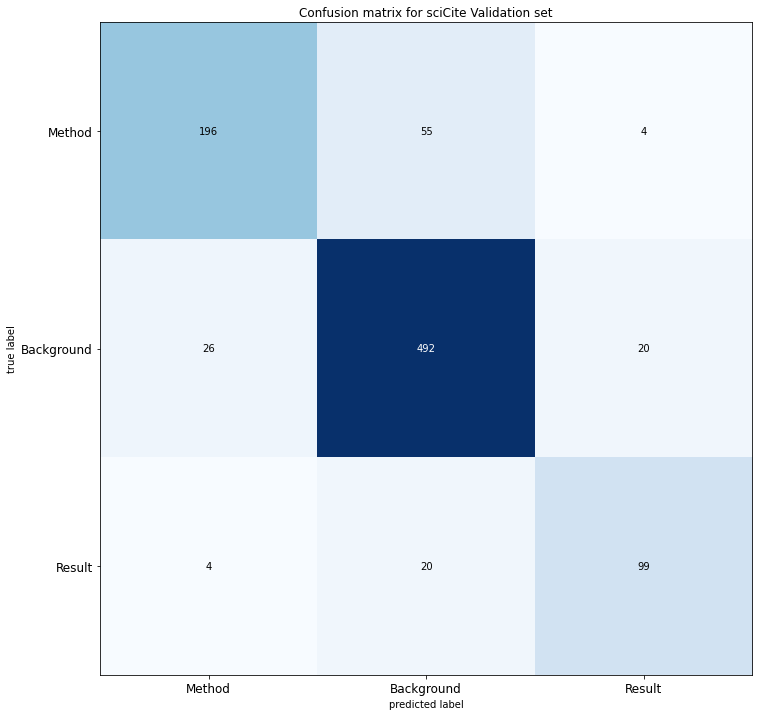

In [24]:

labels = ['Method', 'Background', 'Result']

plt.figure()
plot_confusion_matrix(conf_matrix, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.title(label = "Confusion matrix for sciCite Validation set")
plt.xticks(range(3), labels, fontsize=12)
plt.yticks(range(3), labels, fontsize=12)
plt.show()